<a href="https://colab.research.google.com/github/esrayuzgec/parkinsonvsalz/blob/main/pdcnvgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 4.9 MB/s 
     |████████████████████████████████| 5.8 MB 63.1 MB/s 
     |████████████████████████████████| 451 kB 80.1 MB/s 
     |████████████████████████████████| 1.3 MB 62.9 MB/s 
     |████████████████████████████████| 1.6 MB 55.9 MB/s 
     |████████████████████████████████| 212 kB 73.2 MB/s 
     |████████████████████████████████| 132 kB 78.1 MB/s 
     |████████████████████████████████| 182 kB 84.3 MB/s 
     |████████████████████████████████| 127 kB 63.2 MB/s 
     |████████████████████████████████| 7.6 MB 49.6 MB/s 
Mounted at /content/gdrive


In [2]:
!pip install timm
import timm
from fastbook import *
import timm
from fastai.vision.all import *
from timm import create_model
from fastai.vision.learner import _update_first_layer
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 549 kB 5.0 MB/s 


In [3]:
path=Path('/content/gdrive/MyDrive/3_cls')    

In [4]:
all_files= get_image_files(path)

In [30]:
from fastai.vision.augment import contrast
tfms = aug_transforms(size=256, 
                      min_scale=0.05,
                      do_flip=False,
                      flip_vert=False,
                      max_rotate=0,
                      max_warp=0,
                    
                      max_zoom=0.02,
                      max_lighting=0.70,
                      p_lighting=0.60
                      
                      )

In [33]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=RandomSplitter(valid_pct=0.1),
                 get_y=parent_label,
                
                 batch_tfms=tfms
                 
                 
)

In [34]:
dls= dblock.dataloaders(all_files)

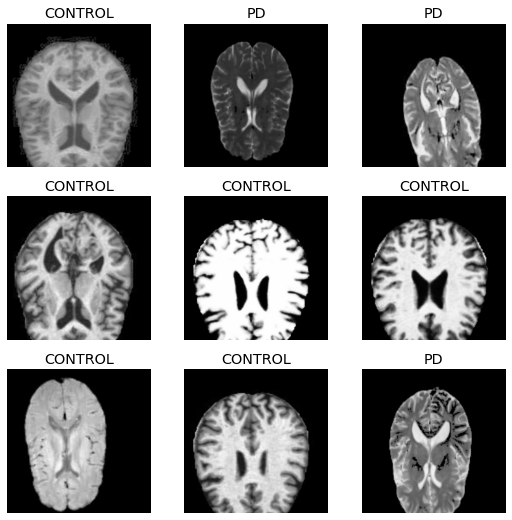

In [35]:
dls.show_batch()

In [36]:
print("Number of examples in testing:", len(dls.valid_ds))

Number of examples in testing: 463


In [37]:
learn = vision_learner(dls, vgg16,metrics=accuracy)

SuggestedLRs(valley=0.001737800776027143)

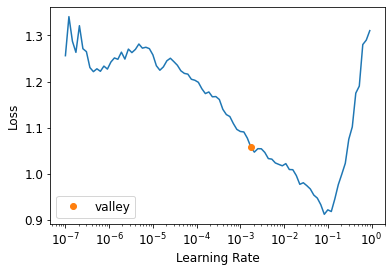

In [38]:
learn.lr_find()

In [40]:
learn.fit_one_cycle(100,1.05e-3)


epoch,train_loss,valid_loss,accuracy,time
0,0.861908,1.410671,0.477322,00:49
1,0.815368,1.713071,0.371490,00:48
2,0.747153,2.130021,0.248380,00:49
3,0.683888,1.563554,0.328294,00:48
4,0.636861,2.118353,0.231102,00:48
5,0.546111,1.114548,0.531317,00:48
6,0.485497,0.684983,0.805616,00:48
7,0.420188,1.066775,0.563715,00:48
8,0.386151,0.380714,0.896328,00:48
9,0.368702,0.290731,0.922246,00:48


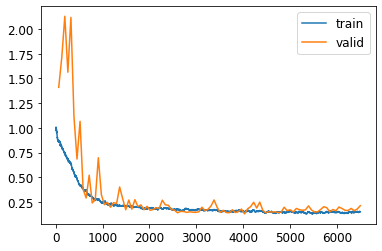

In [41]:
learn.recorder.plot_loss()

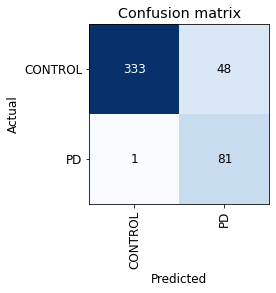

In [42]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [45]:
interp.print_classification_report()


              precision    recall  f1-score   support

     CONTROL       1.00      0.87      0.93       381
          PD       0.63      0.99      0.77        82

    accuracy                           0.89       463
   macro avg       0.81      0.93      0.85       463
weighted avg       0.93      0.89      0.90       463



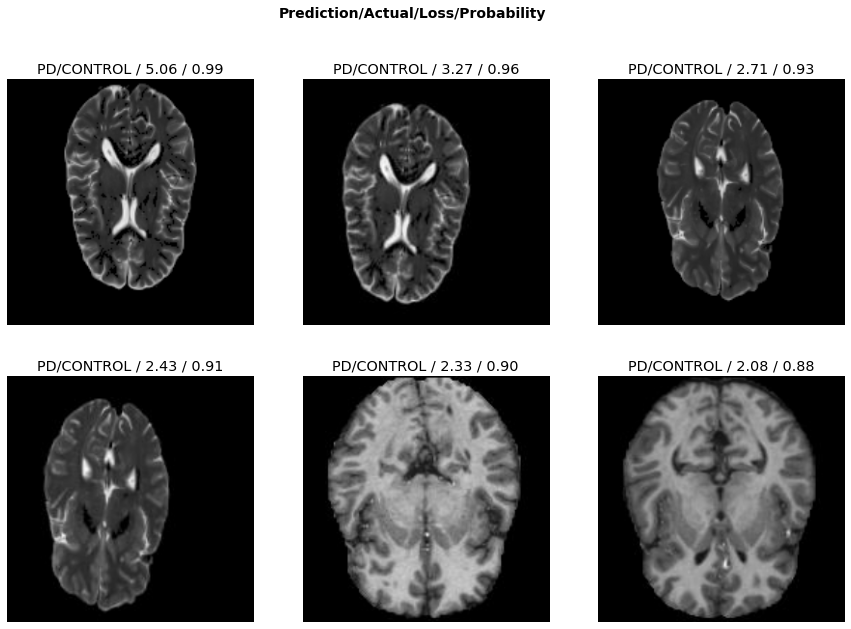

In [46]:
interp.plot_top_losses(6, figsize=(15,10))


In [43]:
learn.save(path/'pdCNVGG16_1')

Path('/content/gdrive/MyDrive/3_cls/pdCNVGG16_1.pth')

In [44]:
learn.export(path/'pdCNVGG16_1.pkl')

In [47]:
all_files= get_image_files(path)


In [48]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=GrandparentSplitter(train_name='train', valid_name='test'),
                 get_y=parent_label,
                 item_tfms=Resize(512,method='squish'),
                 batch_tfms=Normalize.from_stats(*imagenet_stats)
                 
                 
)

In [49]:
dls_test = dblock.dataloaders(all_files)


In [50]:
print("Number of examples in testing:", len(dls_test.valid_ds))


Number of examples in testing: 723


In [52]:
learn1 = vision_learner(dls_test, vgg16, metrics=accuracy).load('/content/gdrive/MyDrive/3_cls/pdCNVGG16_1')


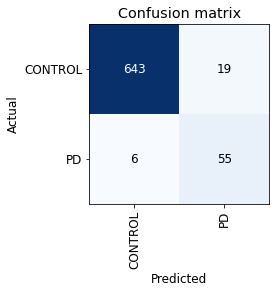

In [53]:
interp= ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [54]:

preds, targs = learn1.tta()
accuracy(preds, targs).item()
     

0.9654218554496765